In [115]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random
%matplotlib inline

In [116]:
# generate Sample data
X = random.sample(range(1, 1000), 100)
y = random.sample(range(1, 1000), 100)
X
y

[748,
 745,
 809,
 912,
 164,
 966,
 988,
 883,
 156,
 115,
 683,
 13,
 81,
 532,
 175,
 91,
 955,
 844,
 616,
 654,
 743,
 826,
 733,
 885,
 665,
 147,
 709,
 837,
 62,
 530,
 160,
 586,
 284,
 298,
 498,
 135,
 1,
 702,
 889,
 692,
 958,
 867,
 712,
 806,
 920,
 771,
 501,
 668,
 573,
 196,
 938,
 65,
 288,
 430,
 497,
 543,
 108,
 821,
 926,
 659,
 655,
 937,
 373,
 952,
 537,
 836,
 512,
 747,
 443,
 474,
 488,
 974,
 796,
 317,
 791,
 776,
 972,
 940,
 305,
 224,
 72,
 797,
 534,
 228,
 801,
 301,
 636,
 378,
 788,
 707,
 262,
 176,
 666,
 767,
 348,
 483,
 688,
 159,
 279,
 381]

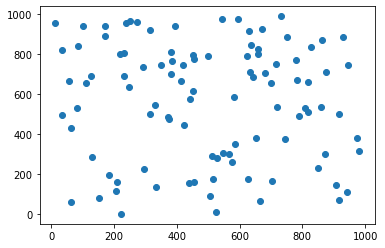

In [117]:
plt.scatter(X,y)
plt.show()

In [118]:
data = pd.DataFrame(list(zip(X,y)), columns =['X','y'])
data.head

<bound method NDFrame.head of       X    y
0   715  748
1   350  745
2   380  809
3   629  912
4   704  164
..  ...  ...
95  371  483
96  231  688
97  209  159
98  527  279
99  974  381

[100 rows x 2 columns]>

In [119]:
print(data.head())
data.dropna(inplace=True)

     X    y
0  715  748
1  350  745
2  380  809
3  629  912
4  704  164


In [120]:
data.head()

,X,y
0,715,748
1,350,745
2,380,809
3,629,912
4,704,164


In [121]:
data.columns

Index(['X', 'y'], dtype='object')

In [122]:
# Plot the scatter plot interactively
import plotly.express as px
fig = px.scatter(data, x="X", y="y")
fig.show()

In [123]:
'''
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)
data = data[(z < 1).all(axis=1)]
'''

'\nfrom scipy import stats\nimport numpy as np\nz = np.abs(stats.zscore(data))\nprint(z)\ndata = data[(z < 1).all(axis=1)]\n'

In [124]:
# Plot the scatter plot interactively
import plotly.express as px
fig = px.scatter(data, x="X", y="y")
fig.show()

In [125]:
data = data.values
data

array([[715, 748],
       [350, 745],
       [380, 809],
       [629, 912],
       [704, 164],
       [251, 966],
       [731, 988],
       [751, 883],
       [439, 156],
       [207, 115],
       [642, 683],
       [526,  13],
       [153,  81],
       [ 82, 532],
       [515, 175],
       [505,  91],
       [ 12, 955],
       [636, 844],
       [453, 616],
       [110, 654],
       [945, 743],
       [657, 826],
       [292, 733],
       [930, 885],
       [ 56, 665],
       [908, 147],
       [632, 709],
       [ 86, 837],
       [ 63,  62],
       [807, 530],
       [455, 160],
       [583, 586],
       [129, 284],
       [566, 298],
       [915, 498],
       [335, 135],
       [221,   1],
       [382, 702],
       [170, 889],
       [127, 692],
       [272, 958],
       [861, 867],
       [875, 712],
       [233, 806],
       [316, 920],
       [780, 771],
       [314, 501],
       [784, 668],
       [443, 573],
       [184, 196],
       [102, 938],
       [664,  65],
       [511,

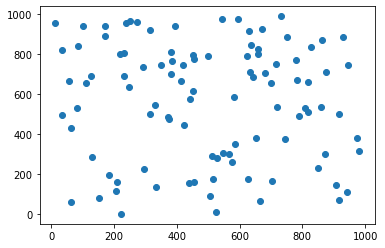

In [126]:
X = data[:,0]
y = data[:,1]
# plot input vs output
plt.scatter(X, y)
plt.show()

y = -0.09 * x + 606.00


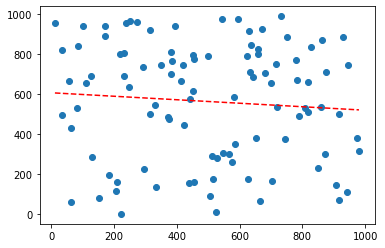

In [127]:
# define the true objective function for linear regression
def objective(x, a, b):
	return a * x + b

# curve fit
popt, _ = curve_fit(objective, X, y)
# summarize the parameter values
a, b = popt
print("y = %.2f * x + %.2f" % (a, b))

# plot input vs output
plt.scatter(X, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(X), max(X), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
y_line[y_line < 0] = 0
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [128]:
x = 200
y = a * x + b
print(y)

588.5444292670136


y = 0.00 * x^2 + -0.26 * x + 586.24


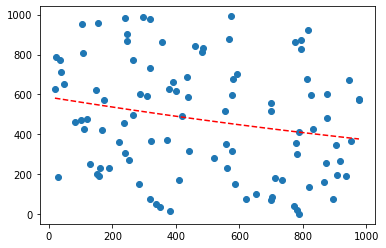

In [110]:
# define the true objective function for poly regression with degree 2
def objective1(x, a, b, c):
    return a * x**2 + b * x + c

popt, _ = curve_fit(objective1, X, y)
# summarize the parameter values
a, b, c = popt
print("y = %.2f * x^2 + %.2f * x + %.2f" % (a, b, c))

# plot input vs output
plt.scatter(X, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(X), max(X), 1)
# calculate the output for the range
y_line = objective1(x_line, a, b, c)
y_line[y_line < 0] = 0
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

y = 0.00 * x^3 + -0.00 * x^2 + 0.06 * x + 558.80


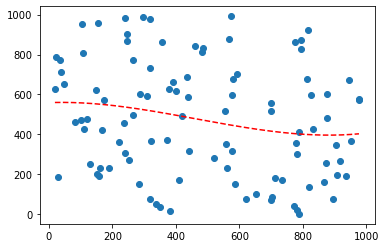

In [111]:
#objective function with degree 3
def objective3(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

popt, _ = curve_fit(objective3, X, y)
# summarize the parameter values
a, b, c, d = popt
print("y = %.2f * x^3 + %.2f * x^2 + %.2f * x + %.2f" % (a, b, c, d))

# plot input vs output
plt.scatter(X, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(X), max(X), 1)
# calculate the output for the range
y_line = objective3(x_line, a, b, c, d)
y_line[y_line < 0] = 0
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

y = 0.00 * x**3 + -0.00 * x**2 + 0.24 * x + 1693314420.67 + -1693313876.53


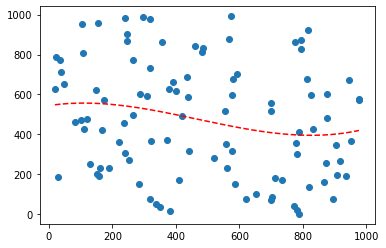

In [112]:
# define the true objective function for poly regression with degree 4
def objective4(x, a, b, c, d, e):
    return a * x**3 + b * x**2 + c * x + d + e

popt, _ = curve_fit(objective4, X, y)
# summarize the parameter values
a, b, c, d, e = popt
print("y = %.2f * x**3 + %.2f * x**2 + %.2f * x + %.2f + %.2f" % (a, b, c, d, e))

# plot input vs output
plt.scatter(X, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(X), max(X), 1)
# calculate the output for the range
y_line = objective4(x_line, a, b, c, d, e)
y_line[y_line < 0] = 0
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

y = -2.91 * x**5 + 0.01 * x**4 + -0.00 * x**3 + 0.00 * x**2 + -0.00 * x + 701.56


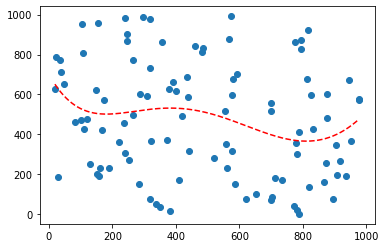

In [113]:
# define the true objective function for poly regression with degree 5
def objective5(x, a, b, c, d ,e , f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

popt , _ = curve_fit(objective5, X, y)
a, b, c, d, e, f = popt
print("y = %.2f * x**5 + %.2f * x**4 + %.2f * x**3 + %.2f * x**2 + %.2f * x + %.2f" % (a, b, c, d, e, f))

# plot input vs output
plt.scatter(X, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(X), max(X), 1)
# calculate the output for the range
y_line = objective5(x_line, a, b, c, d, e, f)
y_line[y_line < 0] = 0
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

y = -133.68 * sin(7.23 - x) + -0.00 * x**2 + 531.76


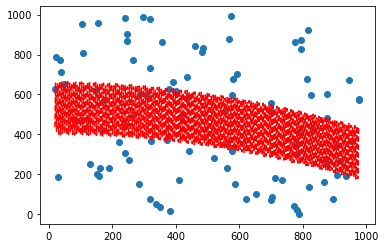

In [114]:
# define the true objective function
def objective4(x, a, b, c, d):
	return a * np.sin(b - x) + c * x**2 + d
 
# curve fit
popt, _ = curve_fit(objective4, X, y)
# summarize the parameter values
a, b, c, d = popt
print("y = %.2f * sin(%.2f - x) + %.2f * x**2 + %.2f" % (a, b, c, d))

# plot input vs output
plt.scatter(X, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(X), max(X), 1)
# calculate the output for the range
y_line = objective4(x_line, a, b, c, d)
y_line[y_line < 0] = 0
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()